In [7]:
#鱼
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存

q_X = QuantumRegister(8, name='X')
q_Y = QuantumRegister(9, name='Y')
q_Z = QuantumRegister(8, name='Z')
q_F = QuantumRegister(1, name='F')
c_X = ClassicalRegister(8)
c_Y = ClassicalRegister(9)
c_Z = ClassicalRegister(8)
c_F = ClassicalRegister(1)
circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F)# ,q_B,c_B

#####HHHHHHHHHHHHHHHHHHHHHH
for h in range(6):
    circuit.append( HGate(),[h]) 
circuit.append( HGate(),[7]) 
for h in range(8,15):
    circuit.append( HGate(),[h])     
circuit.append( HGate(),[16])  

for h in range(17,23):
    circuit.append( HGate(),[h])     
circuit.append( HGate(),[24])  



# **封装 2875 个 MCXGate 为子电路**
def create_mcx_subcircuit():
    sub_qr = QuantumRegister(26, name="sub_q")
    sub_circuit = QuantumCircuit(sub_qr, name="FQPC")
    
    return sub_circuit.to_gate()

# 添加封装好的门
mcx_gate = create_mcx_subcircuit()
circuit.append(mcx_gate, range(26))

circuit.barrier()

#circuit.ry((np.pi/1000), q_X[6])#基态0保持为0的概率很大
#circuit.ry((np.pi/1000), q_Y[7])#基态0保持为0的概率很大
#circuit.ry((np.pi/1000), q_Z[6])#基态0保持为0的概率很大
circuit.ry((np.pi), q_X[6])#基态0保持为0的概率很大
circuit.ry((np.pi), q_Y[7])#基态0保持为0的概率很大
circuit.ry((np.pi), q_Z[6])#基态0保持为0的概率很大
circuit.barrier()
circuit.swap(q_X[0],q_X[6])
circuit.swap(q_X[1],q_X[5])
circuit.swap(q_X[2],q_X[4])


circuit.swap(q_Y[0],q_Y[7])
circuit.swap(q_Y[1],q_Y[6])
circuit.swap(q_Y[2],q_Y[5])
circuit.swap(q_Y[3],q_Y[4])


circuit.swap(q_Z[0],q_Z[6])
circuit.swap(q_Z[1],q_Z[5])
circuit.swap(q_Z[2],q_Z[4])
circuit.barrier()

gate1 = MCXGate(2,ctrl_state='10')
gate2 = MCXGate(2,ctrl_state='11')
gate3 = MCXGate(2,ctrl_state='01')
gate4 = MCXGate(2,ctrl_state='00')
circuit.append(gate2, [q_X[1], q_Y[0] ,q_Z[2]])#3
circuit.append(gate4, [q_X[4], q_Z[6] ,q_Y[1]])#8
circuit.append(gate2, [q_Y[4], q_Z[4] ,q_X[7]])#11
circuit.append(gate4, [q_X[1], q_Y[8] ,q_Z[7]])#4
circuit.append(gate1, [q_Y[2], q_Z[0] ,q_X[5]])#9
circuit.append(gate1, [q_Y[6], q_Z[0] ,q_X[6]])#9
circuit.append(gate3, [q_Y[6], q_Z[3] ,q_X[4]])#10
circuit.append(gate2, [q_X[6], q_Z[7] ,q_Y[7]])#7
circuit.append(gate4, [q_Y[6], q_Z[1] ,q_X[0]])#12
circuit.append(gate2, [q_X[3], q_Y[7] ,q_Z[4]])#3
circuit.append(gate2, [q_X[7], q_Z[7] ,q_Y[5]])#7
circuit.append(gate4, [q_Y[8], q_Z[2] ,q_X[1]])#12
circuit.append(gate3, [q_X[5], q_Y[2] ,q_Z[6]])#2
circuit.append(gate1, [q_X[6], q_Z[4] ,q_Y[7]])#5
circuit.append(gate2, [q_Y[4], q_Z[7] ,q_X[5]])#11
circuit.append(gate2, [q_X[6], q_Y[8] ,q_Z[0]])#3
circuit.append(gate4, [q_X[4], q_Z[3] ,q_Y[2]])#8
circuit.append(gate2, [q_Y[6], q_Z[7] ,q_X[6]])#11
circuit.append(gate1, [q_X[0], q_Z[1] ,q_Y[7]])#5
circuit.append(gate2, [q_Y[5], q_Z[4] ,q_X[3]])#11
circuit.append(gate2, [q_X[7], q_Y[8] ,q_Z[7]])#3
circuit.append(gate4, [q_X[2], q_Z[1] ,q_Y[3]])#8
circuit.append(gate2, [q_Y[7], q_Z[4] ,q_X[6]])#11
circuit.append(gate1, [q_X[5], q_Z[7] ,q_Y[4]])#5
circuit.append(gate2, [q_Y[8], q_Z[0] ,q_X[6]])#11
circuit.append(gate4, [q_X[5], q_Y[2] ,q_Z[3]])#4
circuit.append(gate1, [q_Y[5], q_Z[7] ,q_X[6]])#9
circuit.append(gate1, [q_Y[7], q_Z[2] ,q_X[4]])#9
circuit.append(gate1, [q_Y[4], q_Z[6] ,q_X[7]])#9
circuit.append(gate1, [q_Y[8], q_Z[5] ,q_X[1]])#9



#circuit.append(gate1, [q_X[], q_Y[] ,q_Z[]])#1
##circuit.append(gate3, [q_X[], q_Y[] ,q_Z[]])#2
##circuit.append(gate2, [q_X[], q_Y[] ,q_Z[]])#3
##circuit.append(gate4, [q_X[], q_Y[] ,q_Z[]])#4

##circuit.append(gate1, [q_X[], q_Z[] ,q_Y[]])#5
##circuit.append(gate3, [q_X[], q_Z[] ,q_Y[]])#6
##circuit.append(gate2, [q_X[], q_Z[] ,q_Y[]])#7
##circuit.append(gate4, [q_X[], q_Z[] ,q_Y[]])#8

##circuit.append(gate1, [q_Y[], q_Z[] ,q_X[]])#9
##circuit.append(gate3, [q_Y[], q_Z[] ,q_X[]])#10
##circuit.append(gate2, [q_Y[], q_Z[] ,q_X[]])#11
##circuit.append(gate4, [q_Y[], q_Z[] ,q_X[]])#12
circuit.barrier()
circuit.ry((np.pi/400), q_F[0])#基态0保持为0的概率很大
circuit.draw(output='mpl',reverse_bits=True,scale=0.55,fold=1000)

circuit.draw(output='mpl',reverse_bits=True,scale=0.55,fold=1000).savefig('Fish加密电路.pdf')

In [2]:
print(circuit.depth())

13


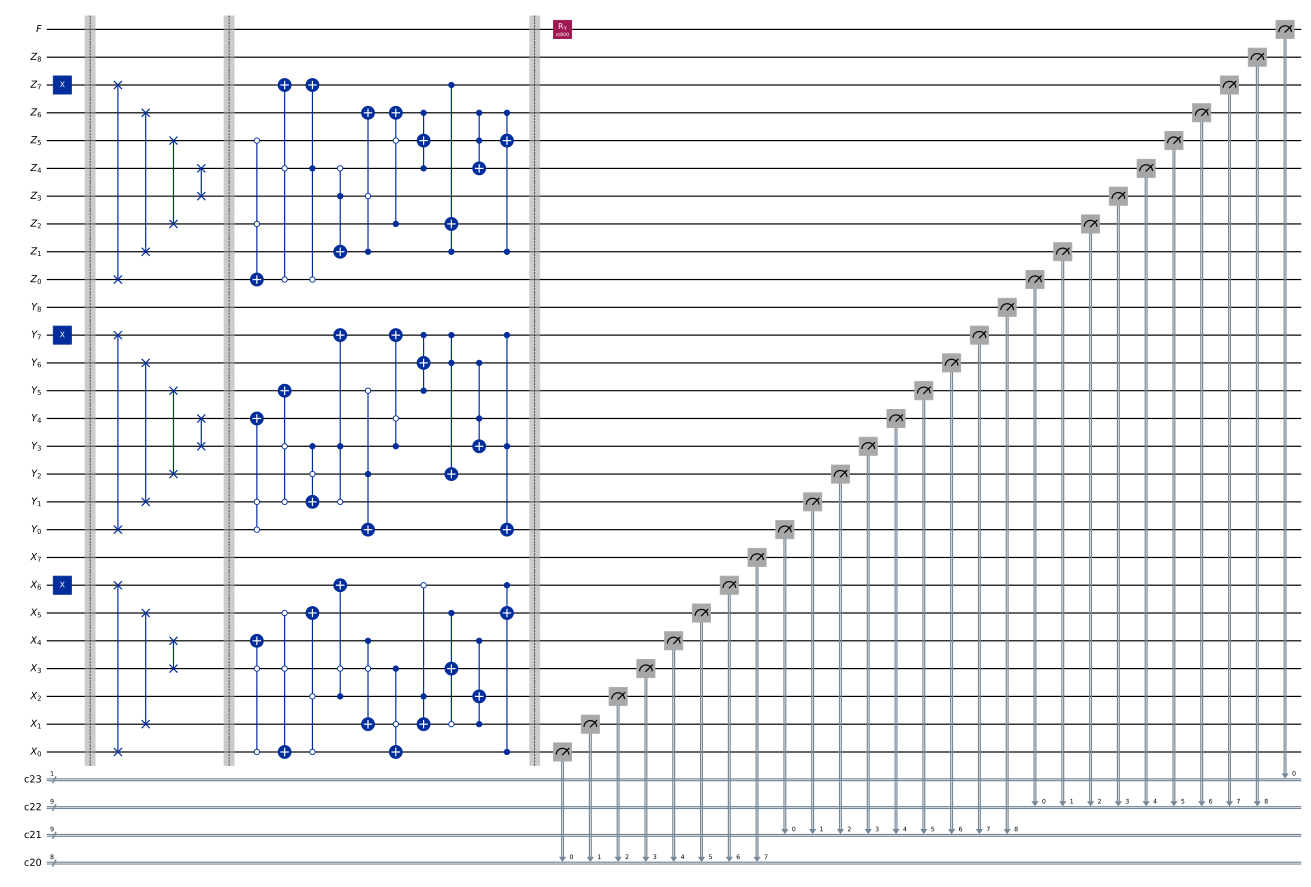

In [9]:
#马
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存

q_X = QuantumRegister(8, name='X')
q_Y = QuantumRegister(9, name='Y')
q_Z = QuantumRegister(9, name='Z')
q_F = QuantumRegister(1, name='F')
c_X = ClassicalRegister(8)
c_Y = ClassicalRegister(9)
c_Z = ClassicalRegister(9)
c_F = ClassicalRegister(1)

circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F,c_X,c_Y,c_Z,c_F)# ,q_B,c_B

#####HHHHHHHHHHHHHHHHHHHHHH
#for h in range(6):
#    circuit.append( HGate(),[h]) 
#circuit.append( HGate(),[7]) 
#for h in range(8,15):
#    circuit.append( HGate(),[h])     
#circuit.append( HGate(),[16])  
#
#for h in range(17,24):
#    circuit.append( HGate(),[h])     
#circuit.append( HGate(),[25])  
#circuit.barrier()

#
#gate = MCXGate(23,ctrl_state='10000111110010100000000')#(-7)
#
#circuit.append(gate, [0,1,2,3,4,5,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,25,26])#门的名称，控制位，控制目标

circuit.x(q_X[6])
circuit.x(q_Y[7])
circuit.x(q_Z[7])
circuit.barrier()
circuit.swap(q_X[0],q_X[6])
circuit.swap(q_X[1],q_X[5])
circuit.swap(q_X[3],q_X[4])


circuit.swap(q_Y[0],q_Y[7])
circuit.swap(q_Y[1],q_Y[6])
circuit.swap(q_Y[2],q_Y[5])
circuit.swap(q_Y[3],q_Y[4])


circuit.swap(q_Z[0],q_Z[7])
circuit.swap(q_Z[1],q_Z[6])
circuit.swap(q_Z[2],q_Z[5])
circuit.swap(q_Z[3],q_Z[4])
circuit.barrier()
#
#
#
#
#
gate1 = MCXGate(2,ctrl_state='00')
circuit.append(gate1, [q_X[3], q_X[0] ,q_X[4]])#门的名称，控制位，控制目标
circuit.append(gate1, [q_X[5], q_X[3] ,q_X[0]])#门的名称，控制位，控制目标
circuit.append(gate1, [q_X[2], q_X[0] ,q_X[5]])#门的名称，控制位，控制目标



circuit.append(gate1, [q_Y[1], q_Y[0] ,q_Y[4]])#门的名称，控制位，控制目标
circuit.append(gate1, [q_Y[1], q_Y[3] ,q_Y[5]])#门的名称，控制位，控制目标

circuit.append(gate1, [q_Z[2], q_Z[5] ,q_Z[0]])#门的名称，控制位，控制目标
circuit.append(gate1, [q_Z[0], q_Z[4] ,q_Z[7]])#门的名称，控制位，控制目标



gate2 = MCXGate(2,ctrl_state='01')
circuit.append(gate2, [q_X[2], q_X[3] ,q_X[6]])#门的名称，控制位，控制目标
circuit.append(gate2, [q_X[4], q_X[3] ,q_X[1]])#门的名称，控制位，控制目标
circuit.append(gate2, [q_X[3], q_X[1] ,q_X[0]])#门的名称，控制位，控制目标

circuit.append(gate2, [q_Y[3], q_Y[2] ,q_Y[1]])#门的名称，控制位，控制目标
circuit.append(gate2, [q_Y[3], q_Y[1] ,q_Y[7]])#门的名称，控制位，控制目标

circuit.append(gate2, [q_Z[4], q_Z[0] ,q_Z[7]])#门的名称，控制位，控制目标

gate3 = MCXGate(2,ctrl_state='10')
circuit.append(gate3, [q_X[6], q_X[2] ,q_X[1]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_X[1], q_X[5] ,q_X[3]])#门的名称，控制位，控制目标


circuit.append(gate3, [q_Y[4], q_Y[3] ,q_Y[7]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_Y[5], q_Y[2] ,q_Y[0]])#门的名称，控制位，控制目标

circuit.append(gate3, [q_Z[4], q_Z[3] ,q_Z[1]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_Z[3], q_Z[1] ,q_Z[6]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_Z[5], q_Z[2] ,q_Z[6]])#门的名称，控制位，控制目标

gate4 = MCXGate(2,ctrl_state='11')
circuit.append(gate4, [q_X[4], q_X[1] ,q_X[2]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_X[0], q_X[6] ,q_X[5]])#门的名称，控制位，控制目标


circuit.append(gate4, [q_Y[7], q_Y[5] ,q_Y[6]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Y[7], q_Y[6] ,q_Y[2]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Y[6], q_Y[4] ,q_Y[3]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Y[7], q_Y[3] ,q_Y[0]])#门的名称，控制位，控制目标

circuit.append(gate4, [q_Z[6], q_Z[4] ,q_Z[5]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Z[5], q_Z[6] ,q_Z[4]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Z[7], q_Z[1] ,q_Z[2]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Z[6], q_Z[1] ,q_Z[5]])#门的名称，控制位，控制目标
circuit.barrier()
circuit.ry((np.pi/800), q_F[0])#基态0保持为0的概率很大
circuit.measure(q_X,c_X)
circuit.measure(q_Y,c_Y)
circuit.measure(q_Z,c_Z)
circuit.measure(q_F,c_F)


circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)



In [8]:
print(circuit.depth())

12


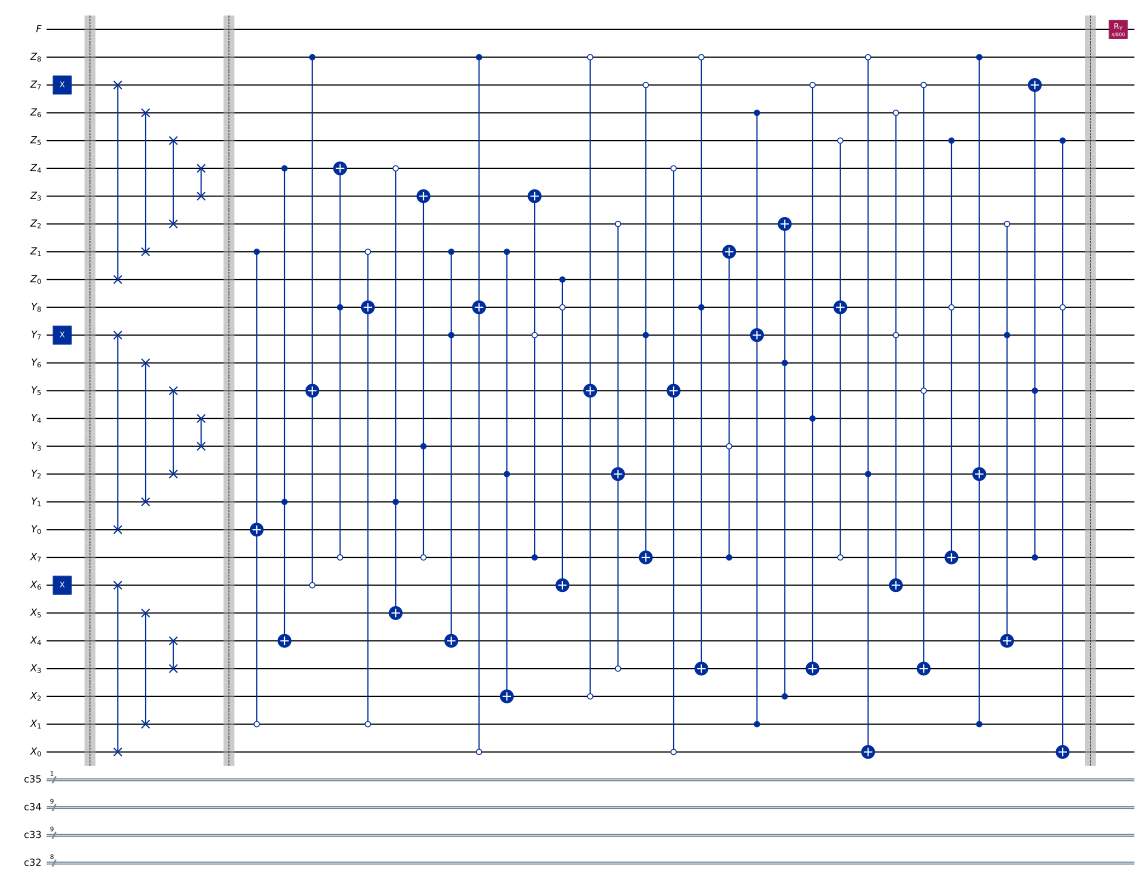

In [14]:

from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存

q_X = QuantumRegister(8, name='X')
q_Y = QuantumRegister(9, name='Y')
q_Z = QuantumRegister(9, name='Z')
q_F = QuantumRegister(1, name='F')
c_X = ClassicalRegister(8)
c_Y = ClassicalRegister(9)
c_Z = ClassicalRegister(9)
c_F = ClassicalRegister(1)

circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F,c_X,c_Y,c_Z,c_F)# ,q_B,c_B



circuit.x(q_X[6])
circuit.x(q_Y[7])
circuit.x(q_Z[7])
circuit.barrier()
circuit.swap(q_X[0],q_X[6])
circuit.swap(q_X[1],q_X[5])
circuit.swap(q_X[3],q_X[4])


circuit.swap(q_Y[0],q_Y[7])
circuit.swap(q_Y[1],q_Y[6])
circuit.swap(q_Y[2],q_Y[5])
circuit.swap(q_Y[3],q_Y[4])


circuit.swap(q_Z[0],q_Z[7])
circuit.swap(q_Z[1],q_Z[6])
circuit.swap(q_Z[2],q_Z[5])
circuit.swap(q_Z[3],q_Z[4])
circuit.barrier()
#
#
#
#
#
gate1 = MCXGate(2,ctrl_state='00')
gate2 = MCXGate(2,ctrl_state='01')
gate3 = MCXGate(2,ctrl_state='10')
gate4 = MCXGate(2,ctrl_state='11')

circuit.append(gate3, [q_X[1], q_Z[1] ,q_Y[0]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Y[1], q_Z[4] ,q_X[4]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_X[7], q_Y[8] ,q_Z[4]])#门的名称，控制位，控制目标
circuit.append(gate1, [q_X[1], q_Z[1] ,q_Y[8]])#门的名称，控制位，控制目标
circuit.append(gate2, [q_Y[1], q_Z[4] ,q_X[5]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_X[6], q_Z[8] ,q_Y[5]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Y[7], q_Z[1] ,q_X[4]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_X[7], q_Y[3] ,q_Z[3]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_X[0], q_Z[8] ,q_Y[8]])#门的名称，控制位，控制目标
circuit.append(gate4, [q_Y[2], q_Z[1] ,q_X[2]])#门的名称，控制位，控制目标
circuit.append(gate2, [q_X[7], q_Y[7] ,q_Z[3]])#门的名称，控制位，控制目标
circuit.append(gate1, [q_X[2], q_Z[8] ,q_Y[5]])#门的名称，控制位，控制目标
circuit.append(gate3, [q_Y[8], q_Z[0] ,q_X[6]])#门的名称，控制位，控制目标
circuit.append(gate1, [q_X[3], q_Z[2] ,q_Y[2]])#5
circuit.append(gate2, [q_Y[7], q_Z[7] ,q_X[7]])#11
circuit.append(gate1, [q_X[0], q_Z[4] ,q_Y[5]])#5
circuit.append(gate2, [q_Y[8], q_Z[8] ,q_X[3]])#11
circuit.append(gate2, [q_X[7], q_Y[3] ,q_Z[1]])#3
circuit.append(gate4, [q_X[1], q_Z[6] ,q_Y[7]])#8
circuit.append(gate2, [q_Y[4], q_Z[7] ,q_X[3]])#11
circuit.append(gate1, [q_X[7], q_Z[5] ,q_Y[8]])#5
circuit.append(gate2, [q_Y[2], q_Z[8] ,q_X[0]])#11
circuit.append(gate4, [q_X[2], q_Y[6] ,q_Z[2]])#4
circuit.append(gate1, [q_Y[7], q_Z[6] ,q_X[6]])#9
circuit.append(gate1, [q_Y[5], q_Z[7] ,q_X[3]])#9
circuit.append(gate3, [q_Y[8], q_Z[5] ,q_X[7]])#10
circuit.append(gate4, [q_X[1], q_Z[8] ,q_Y[2]])#8
circuit.append(gate2, [q_Y[7], q_Z[2] ,q_X[4]])#11
circuit.append(gate4, [q_X[7], q_Y[5] ,q_Z[7]])#4
circuit.append(gate3, [q_Y[8], q_Z[5] ,q_X[0]])#10

circuit.barrier()
circuit.ry((np.pi/800), q_F[0])#基态0保持为0的概率很大

circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)



In [15]:
print(circuit.depth())

13
